## Generate Data
- First, we need to generate some sample data that we can use to fit our models. 
- We will use numpy to generate 100 samples, each with 30 features and 40 tasks. 
- We will also randomly select 5 relevant features and create coefficients for them using sine waves with random frequency and phase. 
- Finally, we will add some random noise to the data.
<br>
#### 我們先建立一組模擬資料，用來訓練模型。
- 產生 `100` 筆樣本（n_samples）
- 每筆樣本有 `30` 個特徵（n_features）
- 每筆資料同時預測 `40` 個任務（n_tasks）
- 選出 `5` 個真正有關的特徵（n_relevant_features）
- 使用 `sin` 函數產生這些特徵在每個任務上的係數
- 加入隨機雜訊模擬實際狀況

In [1]:
import numpy as np

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

## Fit Models
- Now that we have our data, we can fit models to it using the Lasso and multi-task Lasso algorithms.
- We will fit a Lasso model for each task and then fit a multi-task Lasso model to all tasks at once.
<br>
###我們使用兩種方式來擬合資料：
1. **Lasso**（單任務版本）：對每一個任務（Y 的每一欄）各自建立一個模型
2. **MultiTaskLasso**：同時考慮所有任務，進行聯合訓練與特徵選擇

這能讓我們比較兩種模型在**特徵選擇一致性**與**泛化能力**上的差異。

In [2]:
from sklearn.linear_model import MultiTaskLasso, Lasso

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.0).fit(X, Y).coef_

## Plot Results
- Finally, we can plot the results of our models to see how they compare.
- We will plot the support
- i.e., the location of non-zero coefficients
- For each model, as well as the time series for one of the features.
<br><br>
- 使用 `plt.spy()` 顯示模型學到的係數矩陣中非零的位置（即有用的特徵）
- 再針對其中一個特徵（如第 0 個）畫出真實值 vs Lasso vs MultiTaskLasso 的係數變化圖

#### 這個步驟可以直觀看出：
- 哪些特徵被模型選中（有非零係數）
- 哪個模型在不同任務中保留了相對一致的特徵重要性

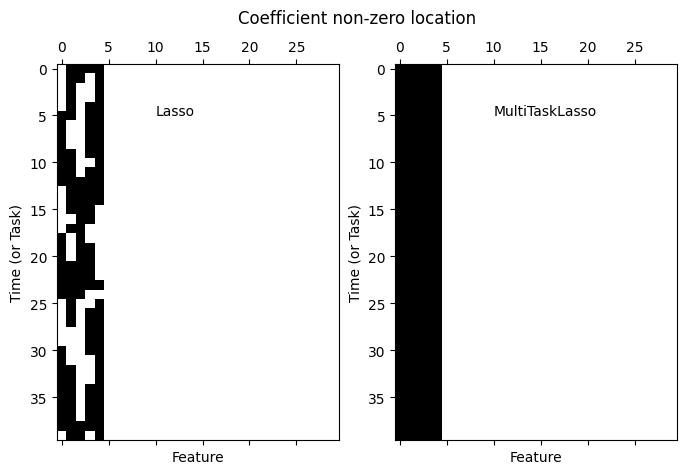

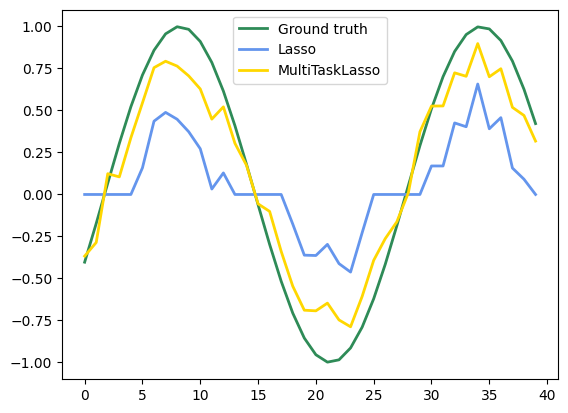

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "Lasso")
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "MultiTaskLasso")
fig.suptitle("Coefficient non-zero location")

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color="seagreen", linewidth=lw, label="Ground truth")
plt.plot(
    coef_lasso_[:, feature_to_plot], color="cornflowerblue", linewidth=lw, label="Lasso"
)
plt.plot(
    coef_multi_task_lasso_[:, feature_to_plot],
    color="gold",
    linewidth=lw,
    label="MultiTaskLasso",
)
plt.legend(loc="upper center")
plt.axis("tight")
plt.ylim([-1.1, 1.1])
plt.show()

## Summary
In this lab, we learned how to perform joint feature selection using the multi-task Lasso algorithm. We generated some sample data, fit models to it using Lasso and multi-task Lasso, and plotted the results. We can see that the multi-task Lasso algorithm is better able to select relevant features across all tasks compared to the Lasso algorithm.
<br><br>
1. 如何產生多任務下的合成資料
2. 如何使用 `Lasso` 與 `MultiTaskLasso` 建模
3. 多任務模型能更穩定地選出跨任務一致的特徵

<br><br>
這樣的設定模擬多輸出預測問題（multi-output regression），例如：
- 醫療數據分析，同時預測多種指標，預測病人的多項生理指標
- 多目標推薦系統，同時推薦多種產品類型，推薦系統同時預測多種用戶行為
- 財務模型預測多項指標，例如多檔股票的回報
- 多輸出回歸問題，如氣象預測多種氣象指標）

## 模型比較
### Lasso
每個任務分開建模，無法共享特徵資訊
<br>
### MultiTaskLasso
所有任務一起建模，可共用有用特徵，提高泛化能力 